In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten
from google.colab import drive
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import img_to_array
import glob
from google.colab.patches import cv2_imshow
import random

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
combined=[]
class_labels=[]
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

Importing the data and preprocessing the images

In [ ]:
for path in glob.glob("/content/drive/My Drive/ImageDataset/Bear/*.jpg"):
  image = cv2.imread(path)
  # Noise Reduction
  image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
  # Resizing Image
  image = cv2.resize(image, (100,100))
  combined.append(image)
  class_labels.append("Bear")

In [ ]:
for path in glob.glob("/content/drive/My Drive/ImageDataset/Bird/*.jpg"):
  image = cv2.imread(path)
  # Noise Reduction
  image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
  # Resizing Image
  image = cv2.resize(image, (100,100))
  combined.append(image)
  class_labels.append("Bird")

In [ ]:
for path in glob.glob("/content/drive/My Drive/ImageDataset/Flower/*.jpg"):
  image = cv2.imread(path)
  # Noise Reduction
  image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
  # Resizing Image
  image = cv2.resize(image, (100,100))
  combined.append(image)
  class_labels.append("Flower")

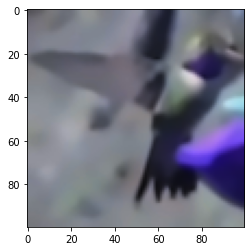

Bird


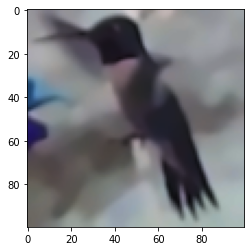

Bird


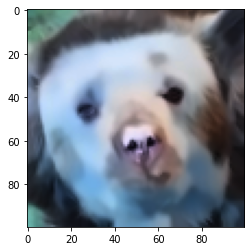

Bear


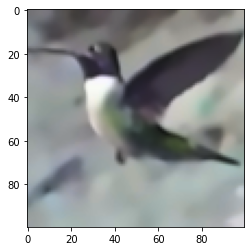

Bird


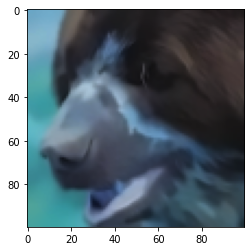

Bear


In [ ]:
for i in range(0,5):
  y=random.randrange(368)
  plt.imshow(combined[y])
  plt.show()
  print(class_labels[y])

## **Custom CNN Model**

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
# Converting label names to intergers
labels=[]
labels = [0 if i=='Bear' else 1 if i=='Bird' else 2 for i in class_labels] 
# Shiffling the data
temp=list(zip(combined,labels))
random.shuffle(temp)
final_combined,final_labels=zip(*temp)
final_combined,final_labels=list(final_combined),list(final_labels)

In [ ]:
X=final_combined
y=final_labels
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(368, 100, 100, 3)

In [ ]:
y.shape

(368,)

In [ ]:
# Splitting the data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Creating the model
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 64)      

In [ ]:
# Model training
epochs=10
history=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 4s 296ms/step - loss: 1.0827 - accuracy: 0.4116
Epoch 2/10
10/10 [==============================] - 3s 287ms/step - loss: 0.8008 - accuracy: 0.5850
Epoch 3/10
10/10 [==============================] - 3s 289ms/step - loss: 0.5621 - accuracy: 0.8605
Epoch 4/10
10/10 [==============================] - 3s 289ms/step - loss: 0.3535 - accuracy: 0.9116
Epoch 5/10
10/10 [==============================] - 3s 297ms/step - loss: 0.2382 - accuracy: 0.9286
Epoch 6/10
10/10 [==============================] - 3s 290ms/step - loss: 0.2066 - accuracy: 0.9286
Epoch 7/10
10/10 [==============================] - 3s 287ms/step - loss: 0.1581 - accuracy: 0.9524
Epoch 8/10
10/10 [==============================] - 3s 293ms/step - loss: 0.1563 - accuracy: 0.9388
Epoch 9/10
10/10 [==============================] - 3s 291ms/step - loss: 0.1112 - accuracy: 0.9660
Epoch 10/10
10/10 [==============================] - 3s 290ms/step - loss: 0.0861 - accuracy: 0.9864

In [ ]:
# Testing the model 
loss,acc=model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.946


In [ ]:
model_predictions=model.predict(X_test)

In [ ]:
model_predictions[10]

array([ 1.2205062, -8.662224 , 10.525268 ], dtype=float32)

In [ ]:
np.argmax(model_predictions[10])

2

In [ ]:
y_test[10]

2

# RESNET-50 Model

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.applications import ResNet50

In [ ]:
# Creating the ResNet50 Model
resnet50 = Sequential()
res_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(100,100,3),pooling='max',classes=3,weights='imagenet')
for layers in res_model.layers:
  layers.trainable=False

resnet50.add(res_model)
resnet50.add(Flatten())
resnet50.add(Dense(512,activation='relu'))
resnet50.add(Dense(3,activation='softmax'))


In [ ]:
# Compiling a model
resnet50.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
resnet50.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_15 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_16 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_17 (ModuleWr  (None, 3)                1539      
 apper)                                                          
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________

In [ ]:
# Fitting the model
resnet50.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 1.7299 - accuracy: 0.8265
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 0.2394 - accuracy: 0.9728
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.0172 - accuracy: 0.9966
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.0086 - accuracy: 0.9966
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 7.1090e-05 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 3.6119e-05 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 4.5019e-05 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 13s 1s/step - loss: 4.4172e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 11s 1s/step - loss: 4.1884e-05 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 11s 1s/step - loss: 3.5990e-05 - accuracy: 1.

In [ ]:
# Testing the model
res_loss,res_acc=resnet50.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % res_acc)

Test Accuracy: 0.973


In [ ]:
# Making predictions using the model
resnet50_predictions=resnet50.predict(X_test)

In [ ]:
resnet50_predictions[10]

array([3.19037123e-11, 1.27518845e-14, 1.00000000e+00], dtype=float32)

In [ ]:
np.argmax(resnet50_predictions[10])

2

In [ ]:
y_test[10]

2

In [ ]:
resnet50_predictions[30]

array([1.0110412e-26, 1.0000000e+00, 1.1075907e-32], dtype=float32)

In [ ]:
np.argmax(resnet50_predictions[30])

1

In [ ]:
y_test[30]

1

The custom CNN model performs well with an accuracy of 94.6% compared to the ResNet50 model which has an accuracy of 97.3%. Since the ResNet has been pretrained on the Imagenet dataset, it clearly outperforms the custom model.